In [2]:
import os

def count_images(directory):
    count = 0
    for subdir, _, files in os.walk(directory):
        count += len(files)
    return count

train_count = count_images('E:\\Webel\\Flowers\\Train')
val_count = count_images('E:\\Webel\\Flowers\\Test')

print(f"Number of images in training directory: {train_count}")
print(f"Number of images in validation directory: {val_count}")


Number of images in training directory: 700
Number of images in validation directory: 300


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Function to define ResNet9 architecture
def ResNet9(input_shape=(224, 224, 3), num_classes=10):
    model = tf.keras.Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

IMAGE_SIZE = (224, 224)

# Load images from directories using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    'E:\\Webel\\Flowers\\Train',  
    target_size=IMAGE_SIZE,  
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'E:\\Webel\\Flowers\\Test',  
    target_size=IMAGE_SIZE,  
    batch_size=32,
    class_mode='categorical',  
    shuffle=False)  # No need to shuffle for evaluation

# Define ResNet9 model
resnet9_model = ResNet9()

# Compile ResNet9 model
resnet9_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train ResNet9 model
history_resnet9 = resnet9_model.fit(train_generator,
                                    epochs=30)

# Evaluate ResNet9 model on test set
resnet9_loss, resnet9_accuracy = resnet9_model.evaluate(test_generator)
print("ResNet9 Accuracy on Test Set:", resnet9_accuracy)

# Define CNN model
cnn = tf.keras.Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'), 
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'), 
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'), 
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile CNN model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
es = EarlyStopping(monitor='accuracy', mode='max', patience=10, verbose=1, restore_best_weights=True)

# Train CNN model
history_cnn = cnn.fit(train_generator,
                      callbacks=[es], 
                      epochs=30)

# Evaluate CNN model on test set
cnn_loss, cnn_accuracy = cnn.evaluate(test_generator)
print("CNN Accuracy on Test Set:", cnn_accuracy)


Found 700 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.1753 - loss: 7.8359
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.4426 - loss: 1.6334
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.5378 - loss: 1.3031
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.6066 - loss: 1.0985
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.7021 - loss: 0.9085
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7616 - loss: 0.6959
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8305 - loss: 0.5335
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.8239 - loss: 0.4967
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8677 - loss: 0.4340
Epoch 10/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.8414 - loss: 0.4788
Epoch 11/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9050 - los

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define image size and number of classes
IMAGE_SIZE = (224, 224)
NUM_CLASSES = 10

# Ensure a clean state
tf.keras.backend.clear_session()

# Load and preprocess images using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    'E:\\Webel\\Flowers\\Train',
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'E:\\Webel\\Flowers\\Test',
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Verify the number of images in each subset
print('Classes in training set:', train_generator.class_indices)
print('Number of samples in each class (training):')
for cls, idx in train_generator.class_indices.items():
    print(f'{cls}: {sum(train_generator.classes == idx)}')

print('Classes in test set:', test_generator.class_indices)
print('Number of samples in each class (test):')
for cls, idx in test_generator.class_indices.items():
    print(f'{cls}: {sum(test_generator.classes == idx)}')

# Load pre-trained DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='accuracy', mode='max', patience=10, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('densenet121_best_model.keras', monitor='accuracy', mode='max', save_best_only=True, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"DenseNet121 Accuracy on Test Set: {test_accuracy:.4f}")



Found 700 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Classes in training set: {'Dahlia': 0, 'Garbera': 1, 'Hibiscus': 2, 'Jasmine': 3, 'Lotus': 4, 'Marigold': 5, 'Rose': 6, 'Sunflower': 7, 'Tulip': 8, 'rajnigandha': 9}
Number of samples in each class (training):
Dahlia: 70
Garbera: 70
Hibiscus: 70
Jasmine: 70
Lotus: 70
Marigold: 70
Rose: 70
Sunflower: 70
Tulip: 70
rajnigandha: 70
Classes in test set: {'Dahlia': 0, 'Garbera': 1, 'Hibiscus': 2, 'Jasmine': 3, 'Lotus': 4, 'Marigold': 5, 'Rose': 6, 'Sunflower': 7, 'Tulip': 8, 'rajnigandha': 9}
Number of samples in each class (test):
Dahlia: 30
Garbera: 30
Hibiscus: 30
Jasmine: 30
Lotus: 30
Marigold: 30
Rose: 30
Sunflower: 30
Tulip: 30
rajnigandha: 30
Epoch 1/30


c:\Users\anuha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3151 - loss: 2.2098
Epoch 1: accuracy improved from -inf to 0.47143, saving model to densenet121_best_model.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.3219 - loss: 2.1838
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 963ms/step - accuracy: 0.8030 - loss: 0.6215
Epoch 2: accuracy improved from 0.47143 to 0.82571, saving model to densenet121_best_model.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8040 - loss: 0.6193  
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8392 - loss: 0.4474
Epoch 3: accuracy improved from 0.82571 to 0.87429, saving model to densenet121_best_model.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8408 - loss: 0.4444
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 973ms/step - accuracy: 0.9266 - loss: 0.2970
Epoch 4: accuracy improved from 0.87429 to 0.90714, saving model to densenet121_best_model.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9258 - loss: 0

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define image size and number of classes
IMAGE_SIZE = (224, 224)
NUM_CLASSES = 10

# Ensure a clean state
tf.keras.backend.clear_session()

# Load and preprocess images using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    'E:\\Webel\\Flowers\\Train',
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'E:\\Webel\\Flowers\\Test',
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Verify the number of images in each subset
print('Classes in training set:', train_generator.class_indices)
print('Number of samples in each class (training):')
for cls, idx in train_generator.class_indices.items():
    print(f'{cls}: {sum(train_generator.classes == idx)}')

print('Classes in test set:', test_generator.class_indices)
print('Number of samples in each class (test):')
for cls, idx in test_generator.class_indices.items():
    print(f'{cls}: {sum(test_generator.classes == idx)}')

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='accuracy', mode='max', patience=10, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('inceptionv3_best_model.keras', monitor='accuracy', mode='max', save_best_only=True, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"InceptionV3 Accuracy on Test Set: {test_accuracy:.4f}")


Found 700 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Classes in training set: {'Dahlia': 0, 'Garbera': 1, 'Hibiscus': 2, 'Jasmine': 3, 'Lotus': 4, 'Marigold': 5, 'Rose': 6, 'Sunflower': 7, 'Tulip': 8, 'rajnigandha': 9}
Number of samples in each class (training):
Dahlia: 70
Garbera: 70
Hibiscus: 70
Jasmine: 70
Lotus: 70
Marigold: 70
Rose: 70
Sunflower: 70
Tulip: 70
rajnigandha: 70
Classes in test set: {'Dahlia': 0, 'Garbera': 1, 'Hibiscus': 2, 'Jasmine': 3, 'Lotus': 4, 'Marigold': 5, 'Rose': 6, 'Sunflower': 7, 'Tulip': 8, 'rajnigandha': 9}
Number of samples in each class (test):
Dahlia: 30
Garbera: 30
Hibiscus: 30
Jasmine: 30
Lotus: 30
Marigold: 30
Rose: 30
Sunflower: 30
Tulip: 30
rajnigandha: 30
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 42s 0us/step
Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2340 - loss: 3.3554
Epoch 1: accuracy improved from -inf to 0.33857, saving model to inceptionv3_best_model.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/s

10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step 
              precision    recall  f1-score   support

      Dahlia       0.93      0.93      0.93        30
     Garbera       0.48      0.93      0.64        30
    Hibiscus       0.00      0.00      0.00        30
     Jasmine       0.96      0.87      0.91        30
       Lotus       0.97      0.93      0.95        30
    Marigold       1.00      0.97      0.98        30
        Rose       0.91      1.00      0.95        30
   Sunflower       0.97      0.97      0.97        30
       Tulip       1.00      0.97      0.98        30
 rajnigandha       0.94      1.00      0.97        30

    accuracy                           0.86       300
   macro avg       0.82      0.86      0.83       300
weighted avg       0.82      0.86      0.83       300



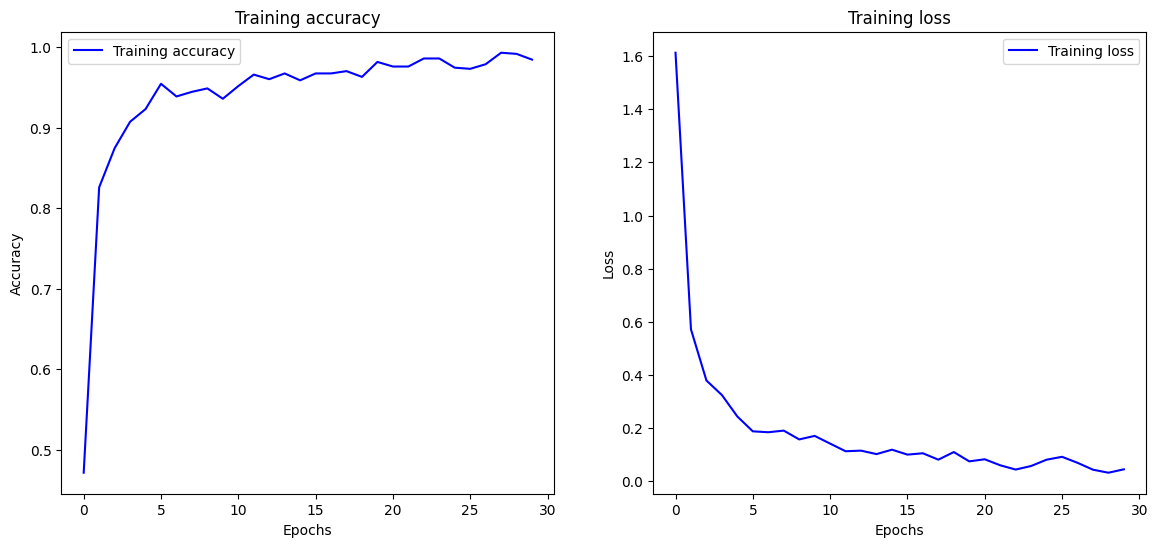

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Make predictions on the test set
test_generator.reset()  # Ensure the generator's state is reset before making predictions
predictions = model.predict(test_generator)
y_pred = predictions.argmax(axis=1)
y_true = test_generator.classes

# Step 2: Generate classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

# Plotting the train and test accuracy and loss curves
# Extract history data
train_acc = history.history['accuracy']
train_loss = history.history['loss']
epochs = range(len(train_acc))

# Step 3: Plot accuracy curve
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Step 4: Plot loss curve
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
